# Large Feature Selection

In [17]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np


### Create a custom dataset with huge number of features
Output only depends on the first features


In [18]:
data = load_iris()
X, y = data["data"], data["target"]

noise = np.random.uniform(0, 10, size=(X.shape[0], 19_996))

X = np.hstack((X, noise))
X.shape

(150, 20000)

### Split the training and test data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Define the GAFeatureSelectionCV options

You can check with ``use_numpy_array=False`` and compare speed execution

In [20]:
clf = SVC()

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="accuracy",
    max_features=256,
    population_size=250,
    generations=20,
    n_jobs=-1,
    tournament_size=25,
    verbose=True,
    elitism=True,
    use_numpy_array=True
)

### Fit the model and see some results

In [21]:
evolved_estimator.fit(X_train, y_train)
features = evolved_estimator.support_

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	250   	0.344511	0.0406353  	0.441176   	0.240048   
1  	500   	0.42007 	0.02051    	0.480689   	0.38057    
2  	500   	0.459565	0.0173089  	0.49079    	0.420974   
3  	500   	0.48651 	0.00791413 	0.510101   	0.461378   
4  	500   	0.501916	0.0129964  	0.560903   	0.490493   
5  	500   	0.530242	0.0186567  	0.57041    	0.500594   
6  	500   	0.561111	0.0126063  	0.599822   	0.510992   
7  	500   	0.581784	0.0163113  	0.630422   	0.560903   
8  	500   	0.609345	0.0135598  	0.630422   	0.571004   
9  	500   	0.628708	0.00654519 	0.639929   	0.600416   
10 	500   	0.633553	0.0044824  	0.640226   	0.630422   
11 	500   	0.641004	0.00481485 	0.660428   	0.630422   
12 	500   	0.650021	0.00843704 	0.660428   	0.639929   
13 	500   	0.660927	0.00333377 	0.670232   	0.65003    
14 	500   	0.664938	0.00488625 	0.670232   	0.660428   
15 	500   	0.670153	0.000873375	0.670232   	0.660428   
16 	500   	0.670742	0.00217674 	0.680036   	0.67

In [22]:
#Best features found
print(evolved_estimator.support_)
print("accuracy score: ", "{:.2f}".format(accuracy))

[    2   230   280   291   406   942  1050  1090  1093  1366  1625  1658
  2280  2363  2488  2642  2703  2726  2843  2865  2910  2975  3147  3467
  3716  3901  3969  4167  4429  4487  4496  4641  4649  4668  4781  5392
  5513  5672  5676  5704  5812  5852  5989  6189  6196  6401  6413  6524
  6528  6735  7330  7989  8276  8383  8461  8463  8677  8703  8785  8933
  9602  9757  9837  9889  9948 10385 10481 10483 10530 10653 10824 11109
 11169 11314 11459 11478 11586 11772 11950 11969 12018 12310 12470 12764
 12774 12798 13032 13366 13452 13485 13566 13634 13807 13855 13995 14170
 14194 14228 14680 14726 15018 15276 15280 15696 16719 17090 17554 17804
 17943 17975 18184 18786 18971 19473 19735 19865]
accuracy score:  0.30


Re-doing a feature selection to find a smaller set of features

In [23]:

clf = SVC()

new_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=5,
    scoring="accuracy",
    max_features=8,
    population_size=250,
    generations=20,
    n_jobs=-1,
    verbose=True,
    tournament_size=25,
    elitism=True,
    use_numpy_array=True
)

In [24]:
new_estimator.fit(X[:, evolved_estimator.support_], y)
features = new_estimator.support_

# Predict only with the subset of selected features
y_predict_ga = new_estimator.predict(X_test[:, evolved_estimator.support_])
accuracy = accuracy_score(y_test, y_predict_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	250   	0.370267	0.109836   	0.786667   	0.18       
1  	500   	0.713733	0.107293   	0.8        	0.4        
2  	500   	0.790267	0.012104   	0.833333   	0.76       
3  	500   	0.814133	0.0146327  	0.84       	0.786667   
4  	500   	0.837867	0.00841586 	0.873333   	0.806667   
5  	500   	0.84896 	0.0137948  	0.873333   	0.833333   
6  	500   	0.872107	0.00535887 	0.873333   	0.84       
7  	500   	0.873333	1.27663e-15	0.873333   	0.873333   
8  	500   	0.873333	1.22171e-15	0.873333   	0.873333   
9  	500   	0.874053	0.0037258  	0.893333   	0.873333   
10 	500   	0.879253	0.00901223 	0.893333   	0.873333   
11 	500   	0.892613	0.00362912 	0.893333   	0.873333   
12 	500   	0.893333	3.9968e-15 	0.893333   	0.893333   
13 	500   	0.893573	0.00124193 	0.9        	0.893333   
14 	500   	0.895333	0.00305505 	0.9        	0.893333   
15 	500   	0.900053	0.00157672 	0.906667   	0.893333   
16 	500   	0.901787	0.00295278 	0.906667   	0.9 

In [25]:
#Best features found
print(new_estimator.support_)
print("accuracy score: ", "{:.2f}".format(accuracy))

[ 0 57]
accuracy score:  0.94


In [26]:
evolved_estimator.support_[new_estimator.support_]

Individual([   2, 8703])

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn_genetic\plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn_genetic\plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


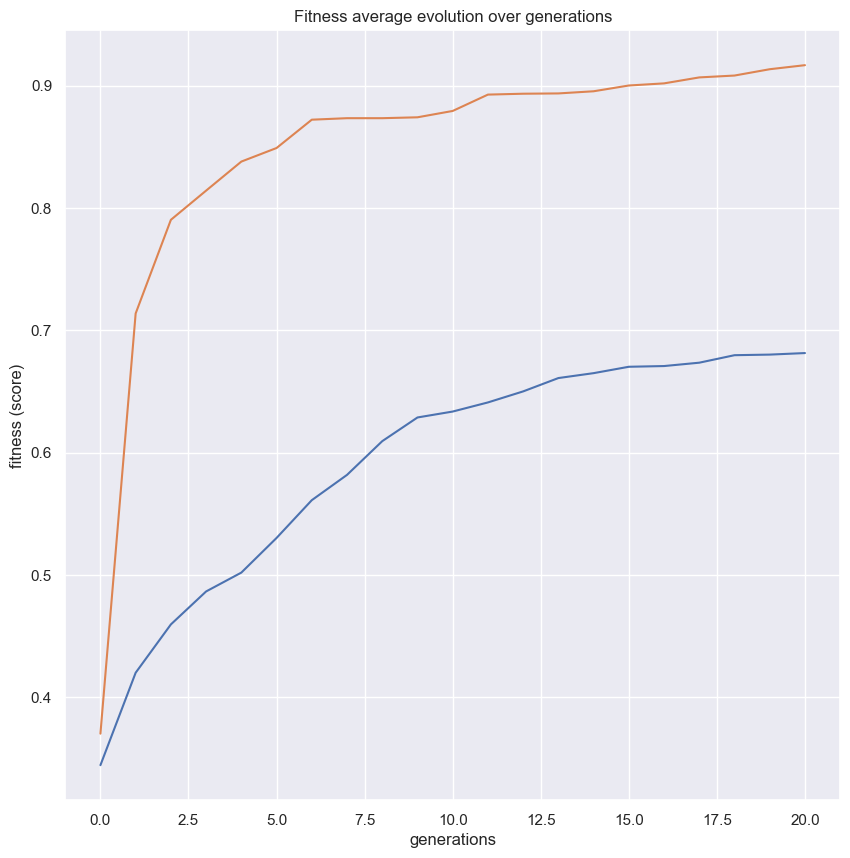

In [27]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plot = plot_fitness_evolution(new_estimator, metric="fitness")
plt.show()

# SVC on all features

In [28]:
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3

# SVC on selected features

In [29]:
clf = SVC()
clf.fit(X_train[:, evolved_estimator.support_[new_estimator.support_]], y_train)
clf.score(X_test[:, evolved_estimator.support_[new_estimator.support_]], y_test)

0.92